In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.feature_selection import mutual_info_classif

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#train_test_split
X = train.drop(labels= ['SalePrice'], axis=1)
Y = train['SalePrice']
x_train,x_test,y_train,y_test = train_test_split(train.drop(labels= ['SalePrice'], axis=1),train['SalePrice'],test_size=0.3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.028933,-0.022520,-0.033714,-0.020823,-0.002116,-0.002974,-0.003206,-0.052316,-0.000744,...,0.002453,0.000190,0.008381,-0.005566,-0.037595,0.002874,0.048538,-0.013604,0.019916,-0.006249
MSSubClass,0.028933,1.000000,-0.364105,-0.170321,0.048366,-0.061622,0.032106,0.070964,0.039729,-0.036039,...,-0.081395,-0.009314,-0.008404,-0.014630,-0.048484,-0.031353,0.001084,-0.019407,-0.021186,-0.053211
LotFrontage,-0.022520,-0.364105,1.000000,0.433176,0.256695,-0.090448,0.113196,0.069850,0.193173,0.266200,...,0.364783,0.078930,0.155430,0.029453,0.061668,0.027946,0.234683,-0.007472,0.009000,-0.004879
LotArea,-0.033714,-0.170321,0.433176,1.000000,0.115142,-0.009608,0.009074,0.006921,0.113744,0.191141,...,0.171495,0.077479,0.082139,-0.019195,0.018731,0.017987,0.094781,0.020409,0.001459,0.000457
OverallQual,-0.020823,0.048366,0.256695,0.115142,1.000000,-0.151733,0.569142,0.523405,0.380413,0.234876,...,0.561208,0.262226,0.300941,-0.115480,0.038938,0.050837,0.094011,-0.025104,0.067043,-0.020268


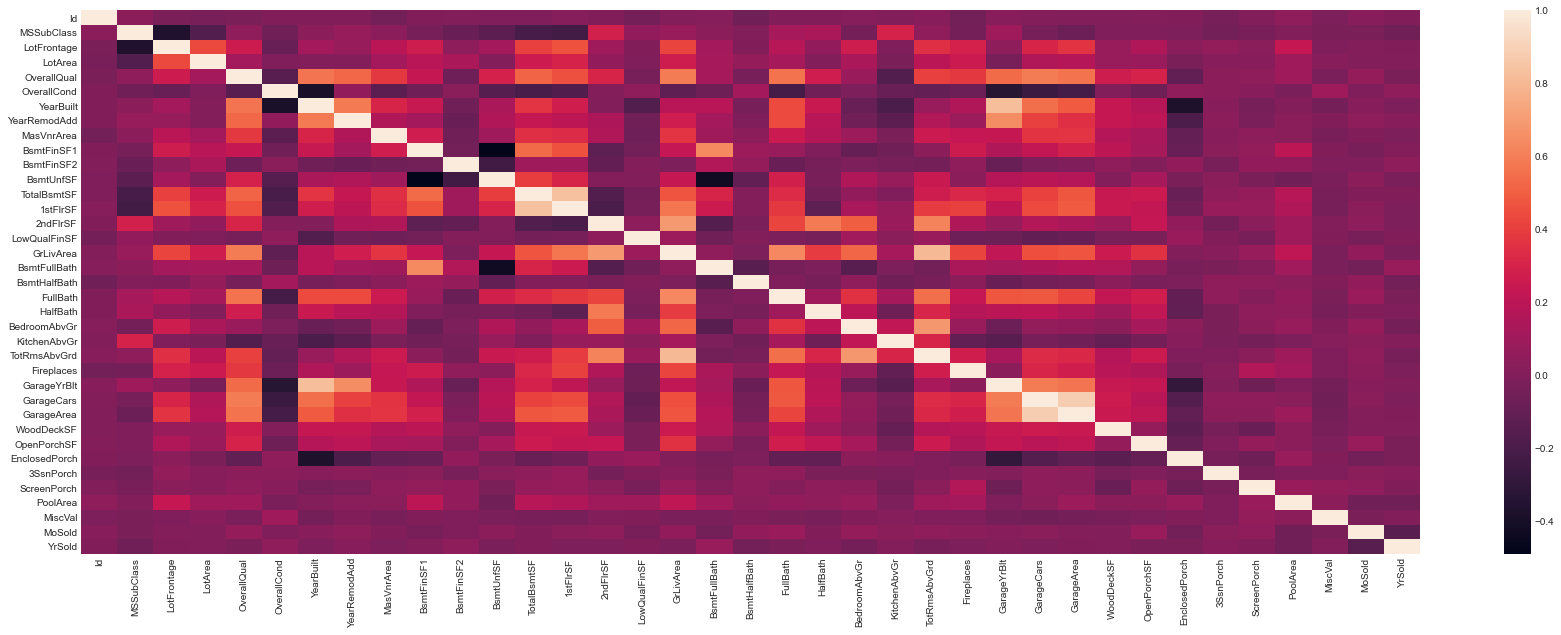

In [7]:
#finding the correlation by table and heatmap 
plt.figure(figsize=(30,10))
sns.heatmap(x_train.corr())
x_train.corr().head()

<AxesSubplot:xlabel='YearBuilt', ylabel='1stFlrSF'>

<Figure size 720x720 with 0 Axes>

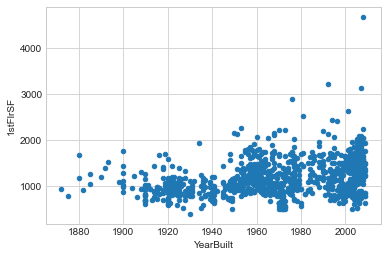

In [8]:
#plotting between simple datd
plt.figure(figsize=(10,10))
x_train.plot.scatter(x = 'YearBuilt' , y = '1stFlrSF' )

<Figure size 720x720 with 0 Axes>

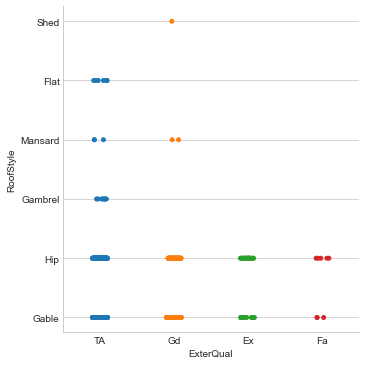

In [9]:
#for plotting between columns having category 
plt.figure(figsize=(10,10))
sns.catplot(x = 'ExterQual' , y = 'RoofStyle',data= x_train)

In [10]:
threshold = 0.5

In [11]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
col_feature = correlation(x_train , threshold)

## Data Cleansing

In [13]:
pd.array(x_train.isna().sum())

<PandasArray>
[   0,    0,    0,  176,    0,    0,  957,    0,    0,    0,    0,    0,    0,
    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    6,
    6,    0,    0,    0,   22,   22,   22,   22,    0,   23,    0,    0,    0,
    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
    0,    0,    0,    0,    0,  480,   60,   60,   60,    0,    0,   60,   60,
    0,    0,    0,    0,    0,    0,    0, 1016,  823,  990,    0,    0,    0,
    0,    0]
Length: 80, dtype: int64

In [14]:
x_train.drop(labels=col_feature, axis=1, inplace=True)
x_test.drop(labels=col_feature, axis=1, inplace=True)
test.drop(labels=col_feature, axis=1, inplace=True)

In [15]:
x_train =x_train.drop(['PoolQC','Fence','MiscFeature'],axis=1)
x_test = x_test.drop(['PoolQC','Fence','MiscFeature'],axis=1)
test = test.drop(['PoolQC','Fence','MiscFeature'],axis=1)

In [16]:
pd.array(x_train.isna().sum())

<PandasArray>
[  0,   0,   0, 176,   0,   0, 957,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   6,   6,   0,   0,   0,  22,  22,
  22,  22,   0,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0, 480,  60,  60,  60,  60,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0]
Length: 64, dtype: int64

In [17]:
test =  test.drop(['Alley'],axis=1)

In [18]:
pd.array(x_train.isna().sum())

<PandasArray>
[  0,   0,   0, 176,   0,   0, 957,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   6,   6,   0,   0,   0,  22,  22,
  22,  22,   0,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0, 480,  60,  60,  60,  60,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0]
Length: 64, dtype: int64

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 1325 to 613
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1022 non-null   int64  
 1   MSSubClass     1022 non-null   int64  
 2   MSZoning       1022 non-null   object 
 3   LotFrontage    846 non-null    float64
 4   LotArea        1022 non-null   int64  
 5   Street         1022 non-null   object 
 6   Alley          65 non-null     object 
 7   LotShape       1022 non-null   object 
 8   LandContour    1022 non-null   object 
 9   Utilities      1022 non-null   object 
 10  LotConfig      1022 non-null   object 
 11  LandSlope      1022 non-null   object 
 12  Neighborhood   1022 non-null   object 
 13  Condition1     1022 non-null   object 
 14  Condition2     1022 non-null   object 
 15  BldgType       1022 non-null   object 
 16  HouseStyle     1022 non-null   object 
 17  OverallQual    1022 non-null   int64  
 18  Overal

In [20]:
x_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1325,1326,30,RM,40.0,3636,Pave,NaN,Reg,Lvl,AllPub,...,0,100,0,0,0,0,1,2008,WD,Normal
1209,1210,20,RL,85.0,10182,Pave,NaN,IR1,Lvl,AllPub,...,50,0,0,0,0,0,5,2006,New,Partial
991,992,70,RM,121.0,17671,Pave,Grvl,Reg,Lvl,AllPub,...,169,0,0,0,0,0,11,2009,WD,Normal
86,87,60,RL,122.0,11911,Pave,NaN,IR2,Lvl,AllPub,...,38,0,0,0,0,0,3,2009,WD,Normal
895,896,60,RL,71.0,7056,Pave,NaN,Reg,Lvl,AllPub,...,50,0,0,0,0,0,10,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,138,0,0,266,0,0,9,2007,New,Partial
854,855,20,RL,102.0,17920,Pave,NaN,Reg,Lvl,AllPub,...,418,0,0,312,0,0,7,2006,WD,Abnorml
1225,1226,80,RL,65.0,10482,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,6,2007,WD,Normal
572,573,60,RL,83.0,13159,Pave,NaN,IR1,HLS,AllPub,...,114,0,0,0,0,0,7,2009,New,Partial


In [21]:
x_train['LotFrontage'].mean()

70.26477541371159

In [22]:
 x_train['LotFrontage'].fillna(x_train['LotFrontage'].mean(),inplace=True)

In [23]:
x_test['LotFrontage'].fillna(x_test['LotFrontage'].mean(),inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].mean(),inplace=True)

In [24]:
pd.array(x_train.isna().sum())

<PandasArray>
[  0,   0,   0,   0,   0,   0, 957,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   6,   6,   0,   0,   0,  22,  22,
  22,  22,   0,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0, 480,  60,  60,  60,  60,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0]
Length: 64, dtype: int64

In [25]:
x_train['MasVnrArea'].describe()

count    1016.000000
mean      102.921260
std       178.641882
min         0.000000
25%         0.000000
50%         0.000000
75%       166.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [26]:
x_train['MasVnrArea'].fillna(x_train['MasVnrArea'].median(),inplace=True)
x_test['MasVnrArea'].fillna(x_test['MasVnrArea'].median(),inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(),inplace=True)

In [27]:
x_train['MasVnrType'].value_counts()

None       598
BrkFace    319
Stone       86
BrkCmn      13
Name: MasVnrType, dtype: int64

In [28]:
x_train['MasVnrType'].fillna(x_train['MasVnrType'].value_counts().index[0],inplace=True)
x_test['MasVnrType'].fillna(x_test['MasVnrType'].value_counts().index[0],inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].value_counts().index[0],inplace=True)

In [29]:
pd.array(x_train.isna().sum())

<PandasArray>
[  0,   0,   0,   0,   0,   0, 957,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22,  22,
  22,  22,   0,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0, 480,  60,  60,  60,  60,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0]
Length: 64, dtype: int64

In [30]:
x_train['BsmtQual'].fillna(x_train['BsmtQual'].value_counts().index[0],inplace=True)
x_test['BsmtQual'].fillna(x_test['BsmtQual'].value_counts().index[0],inplace=True)
test['BsmtQual'].fillna(test['BsmtQual'].value_counts().index[0],inplace=True)

In [31]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 1325 to 613
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1022 non-null   int64  
 1   MSSubClass     1022 non-null   int64  
 2   MSZoning       1022 non-null   object 
 3   LotFrontage    1022 non-null   float64
 4   LotArea        1022 non-null   int64  
 5   Street         1022 non-null   object 
 6   Alley          65 non-null     object 
 7   LotShape       1022 non-null   object 
 8   LandContour    1022 non-null   object 
 9   Utilities      1022 non-null   object 
 10  LotConfig      1022 non-null   object 
 11  LandSlope      1022 non-null   object 
 12  Neighborhood   1022 non-null   object 
 13  Condition1     1022 non-null   object 
 14  Condition2     1022 non-null   object 
 15  BldgType       1022 non-null   object 
 16  HouseStyle     1022 non-null   object 
 17  OverallQual    1022 non-null   int64  
 18  Overal

In [32]:
x_train['BsmtCond'].fillna(x_train['BsmtCond'].value_counts().index[0],inplace=True)
x_test['BsmtCond'].fillna(x_test['BsmtCond'].value_counts().index[0],inplace=True)
test['BsmtCond'].fillna(test['BsmtCond'].value_counts().index[0],inplace=True)

In [33]:
x_train['BsmtExposure'].fillna(x_train['BsmtExposure'].value_counts().index[0],inplace=True)
x_test['BsmtExposure'].fillna(x_test['BsmtExposure'].value_counts().index[0],inplace=True)
test['BsmtExposure'].fillna(test['BsmtExposure'].value_counts().index[0],inplace=True)

In [34]:
pd.array(x_train.isna().sum())

<PandasArray>
[  0,   0,   0,   0,   0,   0, 957,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   0,  22,   0,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0, 480,  60,  60,  60,  60,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0]
Length: 64, dtype: int64

In [35]:
x_train['BsmtFinType1'].fillna(x_train['BsmtFinType1'].value_counts().index[0],inplace=True)
x_test['BsmtFinType1'].fillna(x_test['BsmtFinType1'].value_counts().index[0],inplace=True)
test['BsmtFinType1'].fillna(test['BsmtFinType1'].value_counts().index[0],inplace=True)

In [36]:
x_train['BsmtFinType2'].fillna(x_train['BsmtFinType2'].value_counts().index[0],inplace=True)
x_test['BsmtFinType2'].fillna(x_test['BsmtFinType2'].value_counts().index[0],inplace=True)
test['BsmtFinType2'].fillna(test['BsmtFinType2'].value_counts().index[0],inplace=True)

In [37]:
x_train['FireplaceQu'].fillna(x_train['FireplaceQu'].value_counts().index[0],inplace=True)
x_test['FireplaceQu'].fillna(x_test['FireplaceQu'].value_counts().index[0],inplace=True)
test['FireplaceQu'].fillna(test['FireplaceQu'].value_counts().index[0],inplace=True)

In [38]:
x_train['GarageType'].fillna(x_train['GarageType'].value_counts().index[0],inplace=True)
x_test['GarageType'].fillna(x_test['GarageType'].value_counts().index[0],inplace=True)
test['GarageType'].fillna(test['GarageType'].value_counts().index[0],inplace=True)

In [39]:
x_train['GarageFinish'].fillna(x_train['GarageFinish'].value_counts().index[0],inplace=True)
x_test['GarageFinish'].fillna(x_test['GarageFinish'].value_counts().index[0],inplace=True)
test['GarageFinish'].fillna(test['GarageFinish'].value_counts().index[0],inplace=True)

In [40]:
x_train['GarageQual'].fillna(x_train['GarageQual'].value_counts().index[0],inplace=True)
x_test['GarageQual'].fillna(x_test['GarageQual'].value_counts().index[0],inplace=True)
test['GarageQual'].fillna(test['GarageQual'].value_counts().index[0],inplace=True)

In [41]:
x_train['GarageCond'].fillna(x_train['GarageCond'].value_counts().index[0],inplace=True)
x_test['GarageCond'].fillna(x_test['GarageCond'].value_counts().index[0],inplace=True)
test['GarageCond'].fillna(test['GarageCond'].value_counts().index[0],inplace=True)

In [42]:
x_test['Electrical'].fillna(x_test['Electrical'].value_counts().index[0],inplace=True)

In [43]:
test['MSZoning'].fillna(test['MSZoning'].value_counts().index[0],inplace=True)

In [44]:
test['Utilities'].fillna(test['Utilities'].value_counts().index[0],inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].value_counts().index[0],inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].value_counts().index[0],inplace=True)

In [45]:
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median(),inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median(),inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].median(),inplace=True)   

In [46]:
test['KitchenQual'].fillna(test['KitchenQual'].value_counts().index[0],inplace=True)
test['Functional'].fillna(test['Functional'].value_counts().index[0],inplace=True)
test['SaleType'].fillna(test['SaleType'].value_counts().index[0],inplace=True)

In [47]:
pd.array(x_train.isna().sum())

<PandasArray>
[  0,   0,   0,   0,   0,   0, 957,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   0,   0,   0,   0]
Length: 64, dtype: int64

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  RoofStyl

In [49]:
x_train.shape

(1022, 64)

In [50]:
x_test.shape

(438, 64)

In [51]:
test.shape

(1459, 63)

In [52]:
x_train.select_dtypes(include=[np.object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1325,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,N,WD,Normal
1209,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,RRNn,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,New,Partial
991,RM,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,P,WD,Normal
86,RL,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,WD,Normal
895,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
854,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1225,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
572,RL,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,Timber,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,New,Partial


In [53]:
x_train.MSZoning.value_counts().sort_values(ascending=False).head(3)

RL    802
RM    152
FV     49
Name: MSZoning, dtype: int64

In [54]:
mszone = [x for x in x_train.MSZoning.value_counts().sort_values(ascending=False).head(3).index]
mszone

['RL', 'RM', 'FV']

In [55]:
for label in mszone:
    x_train[label] = np.where(x_train['MSZoning']==label , 1, 0)
x_train = x_train.drop(['MSZoning'], axis=1)

In [56]:
x_train.Street.value_counts().sort_values(ascending=False).head(3)

Pave    1020
Grvl       2
Name: Street, dtype: int64

In [57]:
x_train = x_train.drop(['Street'], axis=1)
x_train

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,RL,RM,FV
1325,1326,30,40.0,3636,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,2008,WD,Normal,0,1,0
1209,1210,20,85.0,10182,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,5,2006,New,Partial,1,0,0
991,992,70,121.0,17671,Grvl,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,11,2009,WD,Normal,0,1,0
86,87,60,122.0,11911,NaN,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,0,3,2009,WD,Normal,1,0,0
895,896,60,71.0,7056,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,10,2008,WD,Normal,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,20,79.0,9416,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,266,0,0,9,2007,New,Partial,1,0,0
854,855,20,102.0,17920,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,312,0,0,7,2006,WD,Abnorml,1,0,0
1225,1226,80,65.0,10482,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,6,2007,WD,Normal,1,0,0
572,573,60,83.0,13159,NaN,IR1,HLS,AllPub,Corner,Gtl,...,0,0,0,7,2009,New,Partial,1,0,0


In [58]:
test = test.drop(['Street'], axis=1)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [59]:
mszone_t = [x for x in test.MSZoning.value_counts().sort_values(ascending=False).head(3).index]
mszone_t

['RL', 'RM', 'FV']

In [60]:
for label in mszone_t:
    test[label] = np.where(test['MSZoning']==label , 1, 0)
test = test.drop(['MSZoning'], axis=1)

In [61]:
test

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,RL,RM,FV
0,1461,20,80.0,11622,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,120,0,0,6,2010,WD,Normal,0,0,0
1,1462,20,81.0,14267,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,12500,6,2010,WD,Normal,1,0,0
2,1463,60,74.0,13830,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,3,2010,WD,Normal,1,0,0
3,1464,60,78.0,9978,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,6,2010,WD,Normal,1,0,0
4,1465,120,43.0,5005,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,144,0,0,1,2010,WD,Normal,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,6,2006,WD,Normal,0,1,0
1455,2916,160,21.0,1894,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,4,2006,WD,Abnorml,0,1,0
1456,2917,20,160.0,20000,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,9,2006,WD,Abnorml,1,0,0
1457,2918,85,62.0,10441,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,700,7,2006,WD,Normal,1,0,0


In [62]:
test.shape

(1459, 64)

In [63]:
x_train = x_train.drop(['Alley'], axis=1)

In [64]:
x_train.shape

(1022, 64)

In [65]:
x_train = x_train.drop(['LotShape'], axis=1)
test = test.drop(['LotShape'], axis=1)

In [66]:
x_train.shape

(1022, 63)

In [67]:
test.shape

(1459, 63)

In [68]:
land_t = [x for x in test.LandContour.value_counts().sort_values(ascending=False).head(3).index]
land_t

['Lvl', 'HLS', 'Bnk']

In [69]:
for label in land_t:
    test[label] = np.where(test['LandContour']==label , 1, 0)
test = test.drop(['LandContour'], axis=1)

In [70]:
land = [x for x in x_train.LandContour.value_counts().sort_values(ascending=False).head(3).index]
land

['Lvl', 'Bnk', 'HLS']

In [71]:
for label in land:
    x_train[label] = np.where(x_train['LandContour']==label , 1, 0)
x_train = x_train.drop(['LandContour'], axis=1)

In [72]:
x_train

,Id,MSSubClass,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MoSold,YrSold,SaleType,SaleCondition,RL,RM,FV,Lvl,Bnk,HLS
1325,1326,30,40.0,3636,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,1,2008,WD,Normal,0,1,0,1,0,0
1209,1210,20,85.0,10182,AllPub,CulDSac,Gtl,Somerst,RRNn,Norm,...,5,2006,New,Partial,1,0,0,1,0,0
991,992,70,121.0,17671,AllPub,Corner,Gtl,OldTown,Artery,Norm,...,11,2009,WD,Normal,0,1,0,1,0,0
86,87,60,122.0,11911,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,3,2009,WD,Normal,1,0,0,1,0,0
895,896,60,71.0,7056,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,10,2008,WD,Normal,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,20,79.0,9416,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,9,2007,New,Partial,1,0,0,1,0,0
854,855,20,102.0,17920,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,7,2006,WD,Abnorml,1,0,0,1,0,0
1225,1226,80,65.0,10482,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,6,2007,WD,Normal,1,0,0,1,0,0
572,573,60,83.0,13159,AllPub,Corner,Gtl,Timber,Norm,Norm,...,7,2009,New,Partial,1,0,0,0,0,1


In [73]:
test

,Id,MSSubClass,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MoSold,YrSold,SaleType,SaleCondition,RL,RM,FV,Lvl,HLS,Bnk
0,1461,20,80.0,11622,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,6,2010,WD,Normal,0,0,0,1,0,0
1,1462,20,81.0,14267,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,6,2010,WD,Normal,1,0,0,1,0,0
2,1463,60,74.0,13830,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,3,2010,WD,Normal,1,0,0,1,0,0
3,1464,60,78.0,9978,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,6,2010,WD,Normal,1,0,0,1,0,0
4,1465,120,43.0,5005,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,1,2010,WD,Normal,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,6,2006,WD,Normal,0,1,0,1,0,0
1455,2916,160,21.0,1894,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,4,2006,WD,Abnorml,0,1,0,1,0,0
1456,2917,20,160.0,20000,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,9,2006,WD,Abnorml,1,0,0,1,0,0
1457,2918,85,62.0,10441,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,7,2006,WD,Normal,1,0,0,1,0,0


In [74]:
x_train = x_train.drop(['Utilities'], axis=1)
test = test.drop(['Utilities'], axis=1)

In [75]:
x_train = x_train.drop(['LotConfig','LandSlope','Neighborhood','Condition1'], axis=1)
test = test.drop(['LotConfig','LandSlope','Neighborhood','Condition1'], axis=1)

In [76]:
x_train = x_train.drop(['Condition2','BldgType','HouseStyle','OverallQual'], axis=1)
test = test.drop(['Condition2','BldgType','HouseStyle','OverallQual'], axis=1)

In [77]:
x_train.RoofStyle.value_counts().sort_values(ascending=False).head(3)

Gable    791
Hip      209
Flat       8
Name: RoofStyle, dtype: int64

In [78]:
roof = [x for x in x_train.RoofStyle.value_counts().sort_values(ascending=False).head(3).index]
roof

['Gable', 'Hip', 'Flat']

In [79]:
for label in roof:
    x_train[label] = np.where(x_train['RoofStyle']==label , 1, 0)
x_train = x_train.drop(['RoofStyle'], axis=1)
x_train

,Id,MSSubClass,LotFrontage,LotArea,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,SaleCondition,RL,RM,FV,Lvl,Bnk,HLS,Gable,Hip,Flat
1325,1326,30,40.0,3636,4,CompShg,AsbShng,AsbShng,None,0.0,...,Normal,0,1,0,1,0,0,1,0,0
1209,1210,20,85.0,10182,5,CompShg,VinylSd,VinylSd,Stone,420.0,...,Partial,1,0,0,1,0,0,0,1,0
991,992,70,121.0,17671,9,CompShg,Wd Sdng,Wd Sdng,None,0.0,...,Normal,0,1,0,1,0,0,1,0,0
86,87,60,122.0,11911,5,CompShg,VinylSd,VinylSd,None,0.0,...,Normal,1,0,0,1,0,0,1,0,0
895,896,60,71.0,7056,5,CompShg,HdBoard,HdBoard,BrkFace,415.0,...,Normal,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,20,79.0,9416,5,CompShg,CemntBd,CmentBd,Stone,205.0,...,Partial,1,0,0,1,0,0,0,1,0
854,855,20,102.0,17920,4,CompShg,Wd Sdng,Plywood,None,0.0,...,Abnorml,1,0,0,1,0,0,0,1,0
1225,1226,80,65.0,10482,8,CompShg,VinylSd,VinylSd,BrkFace,63.0,...,Normal,1,0,0,1,0,0,0,1,0
572,573,60,83.0,13159,5,CompShg,VinylSd,VinylSd,None,0.0,...,Partial,1,0,0,0,0,1,1,0,0


In [80]:
roof_t = [x for x in test.RoofStyle.value_counts().sort_values(ascending=False).head(3).index]
roof_t

['Gable', 'Hip', 'Gambrel']

In [81]:
for label in roof_t:
    test[label] = np.where(test['RoofStyle']==label , 1, 0)
test = test.drop(['RoofStyle'], axis=1)
test

,Id,MSSubClass,LotFrontage,LotArea,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,SaleCondition,RL,RM,FV,Lvl,HLS,Bnk,Gable,Hip,Gambrel
0,1461,20,80.0,11622,6,CompShg,VinylSd,VinylSd,None,0.0,...,Normal,0,0,0,1,0,0,1,0,0
1,1462,20,81.0,14267,6,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,...,Normal,1,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,CompShg,VinylSd,VinylSd,None,0.0,...,Normal,1,0,0,1,0,0,1,0,0
3,1464,60,78.0,9978,6,CompShg,VinylSd,VinylSd,BrkFace,20.0,...,Normal,1,0,0,1,0,0,1,0,0
4,1465,120,43.0,5005,5,CompShg,HdBoard,HdBoard,None,0.0,...,Normal,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,7,CompShg,CemntBd,CmentBd,None,0.0,...,Normal,0,1,0,1,0,0,1,0,0
1455,2916,160,21.0,1894,5,CompShg,CemntBd,CmentBd,None,0.0,...,Abnorml,0,1,0,1,0,0,1,0,0
1456,2917,20,160.0,20000,7,CompShg,VinylSd,VinylSd,None,0.0,...,Abnorml,1,0,0,1,0,0,1,0,0
1457,2918,85,62.0,10441,5,CompShg,HdBoard,Wd Shng,None,0.0,...,Normal,1,0,0,1,0,0,1,0,0


In [82]:
x_train = x_train.drop(['RoofMatl'], axis=1)
test = test.drop(['RoofMatl'], axis=1)

In [83]:
x_train = x_train.drop(['Exterior1st','Exterior2nd','MasVnrArea','ExterQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','HeatingQC','CentralAir','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond','PavedDrive'], axis=1)
test = test.drop(['Exterior1st','Exterior2nd','MasVnrArea','ExterQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','HeatingQC','CentralAir','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond','PavedDrive'], axis=1)

In [84]:
x_train.shape

(1022, 37)

In [85]:
test.shape

(1459, 37)

In [86]:
x_train = x_train.drop(['MasVnrType'], axis=1)
test = test.drop(['MasVnrType'], axis=1)

In [87]:
x_train.ExterCond.value_counts().sort_values(ascending=False).head(3)

TA    899
Gd    103
Fa     17
Name: ExterCond, dtype: int64

In [88]:
con = [x for x in x_train.ExterCond.value_counts().sort_values(ascending=False).head(3).index]
con

['TA', 'Gd', 'Fa']

In [89]:
for label in con:
    x_train[label] = np.where(x_train['ExterCond']==label , 1, 0)
x_train = x_train.drop(['ExterCond'], axis=1)

In [90]:
con_t = [x for x in test.ExterCond.value_counts().sort_values(ascending=False).head(3).index]
con_t

['TA', 'Gd', 'Fa']

In [91]:
for label in con_t:
    test[label] = np.where(test['ExterCond']==label , 1, 0)
test = test.drop(['ExterCond'], axis=1)

In [92]:
fon = [x for x in x_train.Foundation.value_counts().sort_values(ascending=False).head(3).index]
fon

['CBlock', 'PConc', 'BrkTil']

In [93]:
for label in fon:
    x_train[label] = np.where(x_train['Foundation']==label , 1, 0)
x_train = x_train.drop(['Foundation'], axis=1)

In [94]:
fon_t = [x for x in test.Foundation.value_counts().sort_values(ascending=False).head(3).index]
fon_t

['PConc', 'CBlock', 'BrkTil']

In [95]:
for label in fon_t:
    test[label] = np.where(test['Foundation']==label , 1, 0)
test = test.drop(['Foundation'], axis=1)

In [96]:
x_train.BsmtQual.value_counts().sort_values(ascending=False).head(3)

TA    483
Gd    433
Ex     82
Name: BsmtQual, dtype: int64

In [97]:
bon = [x for x in x_train.BsmtQual.value_counts().sort_values(ascending=False).head(3).index]
bon

['TA', 'Gd', 'Ex']

In [98]:
for label in bon:
    x_train[label] = np.where(x_train['BsmtQual']==label , 1, 0)
x_train = x_train.drop(['BsmtQual'], axis=1)

In [99]:
bon_t = [x for x in test.BsmtQual.value_counts().sort_values(ascending=False).head(3).index]
for label in bon_t:
    test[label] = np.where(test['BsmtQual']==label , 1, 0)
test = test.drop(['BsmtQual'], axis=1)

In [100]:
fi = [x for x in x_train.FireplaceQu.value_counts().sort_values(ascending=False).head(3).index]
for label in fi:
    x_train[label] = np.where(x_train['FireplaceQu']==label , 1, 0)
x_train = x_train.drop(['FireplaceQu'], axis=1)

In [101]:
fi_t = [x for x in test.FireplaceQu.value_counts().sort_values(ascending=False).head(3).index]
for label in fi_t:
    test[label] = np.where(test['FireplaceQu']==label , 1, 0)
test = test.drop(['FireplaceQu'], axis=1)

In [102]:
x_train = x_train.drop(['GarageType'], axis=1)
test = test.drop(['GarageType'], axis=1)

In [103]:
x_train = x_train.drop(['SaleType'], axis=1)
test = test.drop(['SaleType'], axis=1)

In [104]:
x_train = x_train.drop(['SaleCondition'], axis=1)
test = test.drop(['SaleCondition'], axis=1)

In [105]:
el = [x for x in x_train.Electrical.value_counts().sort_values(ascending=False).head(3).index]
for label in el:
    x_train[label] = np.where(x_train['Electrical']==label , 1, 0)
x_train = x_train.drop(['Electrical'], axis=1)

In [106]:
el_t = [x for x in test.Electrical.value_counts().sort_values(ascending=False).head(3).index]
for label in el_t:
    test[label] = np.where(test['Electrical']==label , 1, 0)
test = test.drop(['Electrical'], axis=1)

In [109]:
x_train.shape

(1022, 38)

In [110]:
test.shape

(1459, 38)

## Model Building 

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn import neighbors
from sklearn.svm import SVR

In [140]:
# model = LinearRegression()
# model = RandomForestRegressor()
model = GradientBoostingRegressor(random_state=10)
# model = linear_model.Lasso(alpha=0.1)
# model = neighbors.KNeighborsRegressor(n_neighbors = 10)
# model = SVR(kernel = 'rbf')

In [141]:
model.fit(x_train , y_train)

GradientBoostingRegressor(random_state=10)

In [142]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train , y_train , cv = 10 )

array([0.59052264, 0.69775909, 0.67550552, 0.74179775, 0.65541164,
       0.66768774, 0.61254146, 0.71032154, 0.63267663, 0.82649722])

In [143]:
results =  model.predict(test)
results 

array([134681.02958073, 173407.11343985, 183768.32161808, ...,
       157076.31196676, 144821.88817917, 194450.25755013])

In [144]:
pd.DataFrame(results)

,0
0,134681.029581
1,173407.113440
2,183768.321618
3,128520.512427
4,146190.167774
...,...
1454,124047.231048
1455,132010.763032
1456,157076.311967
1457,144821.888179


In [145]:
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = results # our model predictions on the test dataset
submission.head()

,Id,SalePrice
0,1461,134681.029581
1,1462,173407.113440
2,1463,183768.321618
3,1464,128520.512427
4,1465,146190.167774


In [146]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (1459 rows).


In [147]:
#convert the datafraem to csv
submission.to_csv('../Prediction/submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [149]:
submissions_check = pd.read_csv("../Prediction/submission.csv")
submissions_check.head()

,Id,SalePrice
0,1461,134681.029581
1,1462,173407.113440
2,1463,183768.321618
3,1464,128520.512427
4,1465,146190.167774
